In [ ]:
from plotnine import *
import pandas as pd
import numpy as np

In [14]:
time = "2024-03-14_14:51"
time = "2024-03-14_15:32"

# time = "2024-03-14_15:32"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_2/kmeans/results/{time}_results.csv")


# remove where dist_measure is 2
# remove where future_candles is 5
# remove where n_clusters is 150 or 200
# remove where log_return_threshold is greater than 0.01
# remove where calmar_ratio_threshold is not 2

df = df[df["dist_measure"] != 2]
df = df[df["future_candles"] != 5]
df = df[df["n_clusters"] != 150]
df = df[df["n_clusters"] != 200]
df = df[df["log_return_threshold"] <= 0.01]
df = df[df["calmar_ratio_threshold"] == 2]

df

,window,train_sum_annualized_return,val_sum_annualized_return,val_sum_max_drawdown,val_avg_calmar_ratio,test_sum_annualized_return,test_sum_max_drawdown,test_avg_calmar_ratio,test_cumsum_annualized_return,n_close_pts,n_perc_pts,dist_measure,future_candles,n_clusters,log_return_threshold,calmar_ratio_threshold,train_size,test_size,random_state
85,0,2.741878,0.149648,0.046971,5.451823,-0.055211,0.130617,-0.038575,-0.055211,24,5,1,10,100,0.01,2.0,14400,1920,10
86,1,3.319568,0.147357,0.045164,3.488963,-0.009995,0.071285,0.259616,-0.065206,24,5,1,10,100,0.01,2.0,14400,1920,10
87,2,1.294368,0.086237,0.021238,5.749169,-0.026120,0.075060,-0.087563,-0.091326,24,5,1,10,100,0.01,2.0,14400,1920,10
88,3,0.907916,0.092244,0.016610,6.829887,0.021294,0.046409,2.675817,-0.070032,24,5,1,10,100,0.01,2.0,14400,1920,10
89,4,1.767534,0.256353,0.081026,6.846753,0.005139,0.139159,1.009087,-0.064893,24,5,1,10,100,0.01,2.0,14400,1920,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,0,2.537585,0.083371,0.009410,11.886881,-0.030948,0.091180,-0.362318,-0.030948,24,5,1,10,100,0.01,2.0,14400,960,42
5264,1,2.408122,0.091247,0.023043,4.058043,0.007378,0.053831,0.158079,-0.023570,24,5,1,10,100,0.01,2.0,14400,960,42
5265,2,2.809205,0.149945,0.036075,9.140062,0.017636,0.072373,1.075389,-0.005933,24,5,1,10,100,0.01,2.0,14400,960,42
5266,3,2.492609,0.125553,0.023332,7.250658,-0.041567,0.082022,0.754970,-0.047500,24,5,1,10,100,0.01,2.0,14400,960,42


/projects/genomic-ml/da2343/cs685/lib/python3.9/site-packages/plotnine/facets/facet.py:446: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


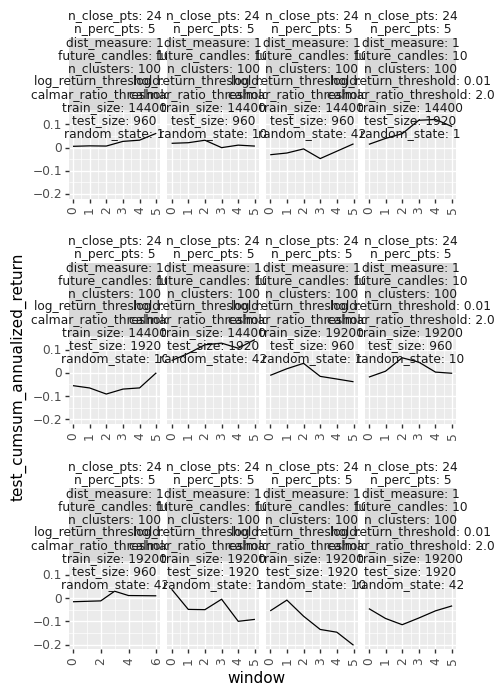

In [16]:
p = ggplot(df)
p = p + geom_line(aes(x="window", y="test_cumsum_annualized_return"))
p = p + facet_wrap("~train_size + test_size + random_state", scales="free_x", labeller="label_both")
p = p + theme(axis_text_x=element_text(angle=90), figure_size=(5, 7))
print(p)